In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2021-01-25 07:30:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.144, 172.217.7.176, 172.217.5.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2021-01-25 07:30:56 (107 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [8]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [9]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [11]:
# Sentences to sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [12]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 5s - loss: 0.6625 - accuracy: 0.5914 - val_loss: 0.5689 - val_accuracy: 0.7898
Epoch 2/30
625/625 - 2s - loss: 0.4233 - accuracy: 0.8311 - val_loss: 0.3806 - val_accuracy: 0.8402
Epoch 3/30
625/625 - 2s - loss: 0.3078 - accuracy: 0.8773 - val_loss: 0.3733 - val_accuracy: 0.8337
Epoch 4/30
625/625 - 2s - loss: 0.2565 - accuracy: 0.9008 - val_loss: 0.3494 - val_accuracy: 0.8523
Epoch 5/30
625/625 - 2s - loss: 0.2215 - accuracy: 0.9148 - val_loss: 0.3421 - val_accuracy: 0.8551
Epoch 6/30
625/625 - 2s - loss: 0.1943 - accuracy: 0.9248 - val_loss: 0.3511 - val_accuracy: 0.8539
Epoch 7/30
625/625 - 2s - loss: 0.1708 - accuracy: 0.9359 - val_loss: 0.3811 - val_accuracy: 0.8439
Epoch 8/30
625/625 - 2s - loss: 0.1529 - accuracy: 0.9441 - val_loss: 0.4102 - val_accuracy: 0.8365
Epoch 9/30
625/625 - 2s - loss: 0.1391 - accuracy: 0.9494 - val_loss: 0.4033 - val_accuracy: 0.8496
Epoch 10/30
625/625 - 2s - loss: 0.1251 - accuracy: 0.9550 - val_loss: 0.4177 - val_accuracy: 0.8509

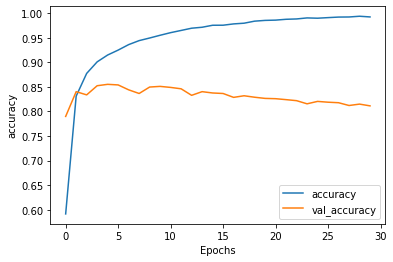

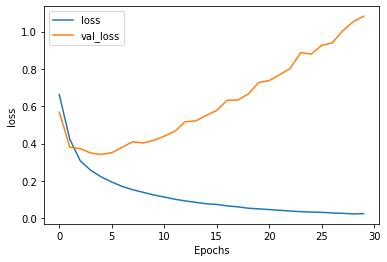

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [17]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [18]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [19]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [21]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))
#Predict labels
print(np.argmax(model.predict(padded)))

[[9.311110e-01]
 [5.220371e-05]]
0


## Hyper parameters 조정

### 1. Reduce vocab_size

In [22]:
vocab_size =  3000 #10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

# Sentences to sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 30
history2 = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6597 - accuracy: 0.6030 - val_loss: 0.5656 - val_accuracy: 0.7250
Epoch 2/30
625/625 - 2s - loss: 0.4391 - accuracy: 0.8117 - val_loss: 0.4037 - val_accuracy: 0.8217
Epoch 3/30
625/625 - 2s - loss: 0.3484 - accuracy: 0.8501 - val_loss: 0.3716 - val_accuracy: 0.8359
Epoch 4/30
625/625 - 2s - loss: 0.3154 - accuracy: 0.8656 - val_loss: 0.3626 - val_accuracy: 0.8420
Epoch 5/30
625/625 - 2s - loss: 0.2947 - accuracy: 0.8759 - val_loss: 0.3652 - val_accuracy: 0.8368
Epoch 6/30
625/625 - 2s - loss: 0.2828 - accuracy: 0.8808 - val_loss: 0.3677 - val_accuracy: 0.8429
Epoch 7/30
625/625 - 2s - loss: 0.2730 - accuracy: 0.8850 - val_loss: 0.3692 - val_accuracy: 0.8380
Epoch 8/30
625/625 - 2s - loss: 0.2667 - accuracy: 0.8889 - val_loss: 0.3776 - val_accuracy: 0.8343
Epoch 9/30
625/625 - 1s - loss: 0.2615 - accuracy: 0.8895 - val_loss: 0.3815 - val_accuracy: 0.8314
Epoch 10/30
625/625 - 2s - loss: 0.2547 - accuracy: 0.8914 - val_loss: 0.3997 - val_accuracy: 0.8319

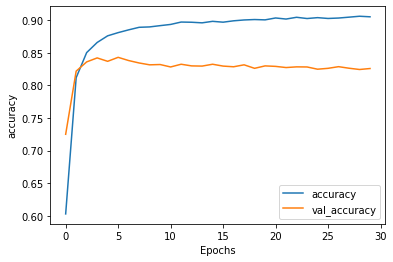

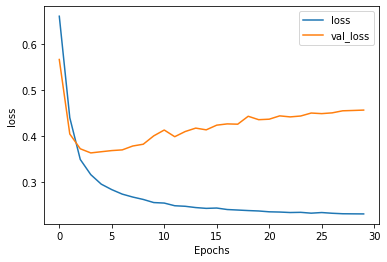

In [23]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

## 2. Reduce maxlen

In [24]:
vocab_size =  10000
embedding_dim = 16
max_length = 30 # 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

# Sentences to sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 30
history3 = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.5524 - accuracy: 0.7094 - val_loss: 0.3900 - val_accuracy: 0.8313
Epoch 2/30
625/625 - 2s - loss: 0.3045 - accuracy: 0.8765 - val_loss: 0.3430 - val_accuracy: 0.8575
Epoch 3/30
625/625 - 2s - loss: 0.2279 - accuracy: 0.9106 - val_loss: 0.3550 - val_accuracy: 0.8472
Epoch 4/30
625/625 - 2s - loss: 0.1822 - accuracy: 0.9294 - val_loss: 0.3764 - val_accuracy: 0.8548
Epoch 5/30
625/625 - 2s - loss: 0.1505 - accuracy: 0.9444 - val_loss: 0.4135 - val_accuracy: 0.8423
Epoch 6/30
625/625 - 2s - loss: 0.1262 - accuracy: 0.9566 - val_loss: 0.4374 - val_accuracy: 0.8445
Epoch 7/30
625/625 - 2s - loss: 0.1078 - accuracy: 0.9639 - val_loss: 0.4954 - val_accuracy: 0.8368
Epoch 8/30
625/625 - 2s - loss: 0.0936 - accuracy: 0.9672 - val_loss: 0.5368 - val_accuracy: 0.8362
Epoch 9/30
625/625 - 2s - loss: 0.0795 - accuracy: 0.9736 - val_loss: 0.5807 - val_accuracy: 0.8314
Epoch 10/30
625/625 - 2s - loss: 0.0698 - accuracy: 0.9768 - val_loss: 0.6462 - val_accuracy: 0.8259

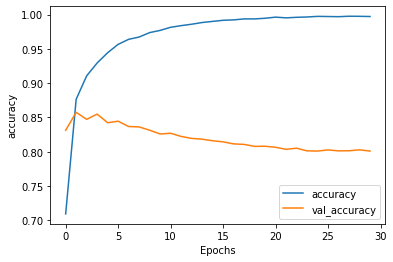

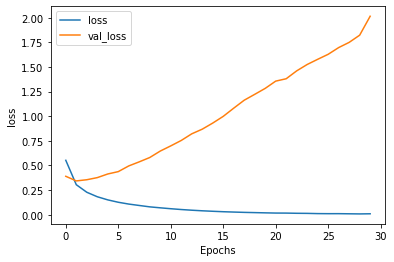

In [25]:
plot_graphs(history3, "accuracy")
plot_graphs(history3, "loss")

### 3. Expand embedding_dim

In [26]:
vocab_size =  10000
embedding_dim = 32 #16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

# Sentences to sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 30
history4 = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6587 - accuracy: 0.6011 - val_loss: 0.5577 - val_accuracy: 0.7217
Epoch 2/30
625/625 - 3s - loss: 0.4111 - accuracy: 0.8384 - val_loss: 0.3750 - val_accuracy: 0.8441
Epoch 3/30
625/625 - 3s - loss: 0.3000 - accuracy: 0.8781 - val_loss: 0.3546 - val_accuracy: 0.8489
Epoch 4/30
625/625 - 3s - loss: 0.2494 - accuracy: 0.8994 - val_loss: 0.3519 - val_accuracy: 0.8450
Epoch 5/30
625/625 - 3s - loss: 0.2123 - accuracy: 0.9175 - val_loss: 0.3561 - val_accuracy: 0.8536
Epoch 6/30
625/625 - 3s - loss: 0.1868 - accuracy: 0.9287 - val_loss: 0.3581 - val_accuracy: 0.8544
Epoch 7/30
625/625 - 3s - loss: 0.1624 - accuracy: 0.9391 - val_loss: 0.4108 - val_accuracy: 0.8359
Epoch 8/30
625/625 - 3s - loss: 0.1443 - accuracy: 0.9480 - val_loss: 0.4125 - val_accuracy: 0.8456
Epoch 9/30
625/625 - 3s - loss: 0.1297 - accuracy: 0.9538 - val_loss: 0.4680 - val_accuracy: 0.8305
Epoch 10/30
625/625 - 3s - loss: 0.1179 - accuracy: 0.9579 - val_loss: 0.4599 - val_accuracy: 0.8439

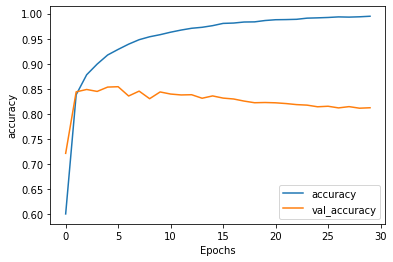

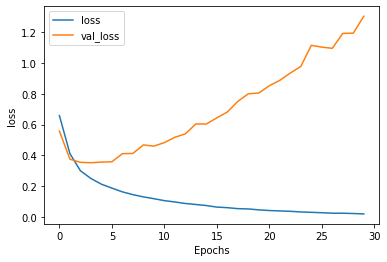

In [27]:
plot_graphs(history4, "accuracy")
plot_graphs(history4, "loss")